<a href="https://colab.research.google.com/github/wendelcfraga/analise-preditiva-jogos-steam/blob/main/steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from wordcloud import WordCloud

In [ ]:
steam = pd.read_csv('/content/drive/My Drive/dataset.csv')

In [ ]:
steam.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [ ]:
steam.shape

(6417106, 5)

In [ ]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


Checando valores nulos do dataset.

In [ ]:
steam.isnull().sum()
list(steam.columns)

['app_id', 'app_name', 'review_text', 'review_score', 'review_votes']

In [ ]:
reviews = steam[['review_score', 'review_text', 'review_votes', 'app_name']]
reviews.isnull().sum()

review_score         0
review_text       7305
review_votes         0
app_name        183234
dtype: int64

Removendo valores nulos.

In [ ]:
reviews.dropna(inplace = True)

<ipython-input-9-6731ae9cb962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.dropna(inplace = True)


In [ ]:
reviews.shape

(6226728, 4)

Checando se há linhas repetidas.

In [ ]:
reviews.duplicated().sum()

1742880

In [ ]:
reviews.drop_duplicates(inplace=True)

<ipython-input-12-da132b68147d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.drop_duplicates(inplace=True)


In [ ]:
reviews.shape

(4483848, 4)

Renomeando as colunas para ficar mais limpo.

In [ ]:
reviews.rename(columns={'review_score':'score', 'review_text':'text'}, inplace=True)
reviews = reviews.sample(n = 50000)

<ipython-input-14-87e672ddd2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.rename(columns={'review_score':'score', 'review_text':'text'}, inplace=True)


In [ ]:
reviews.head()

,score,text,review_votes,app_name
2326517,1,This game is just.............. AWESOME!!!! 'R...,0,PAYDAY: The Heist
3395288,1,"Pretty good game, addictive , Its so much more...",0,A Story About My Uncle
4483435,1,"Great controls, best ARPG controls I've tried.",0,Victor Vran
686571,1,"I've got this on xbox, and now the PC. It runs...",0,Saints Row IV
5851873,1,What's better than listening to music? Having ...,0,Beat Hazard


Contar a frequência de cada valor único na coluna 'score', para entender o balanceamento da variável alvo.

In [ ]:
reviews['score'].value_counts()

 1    41101
-1     8899
Name: score, dtype: int64

Mostrando o gráfico dos scores negativos e positivos.

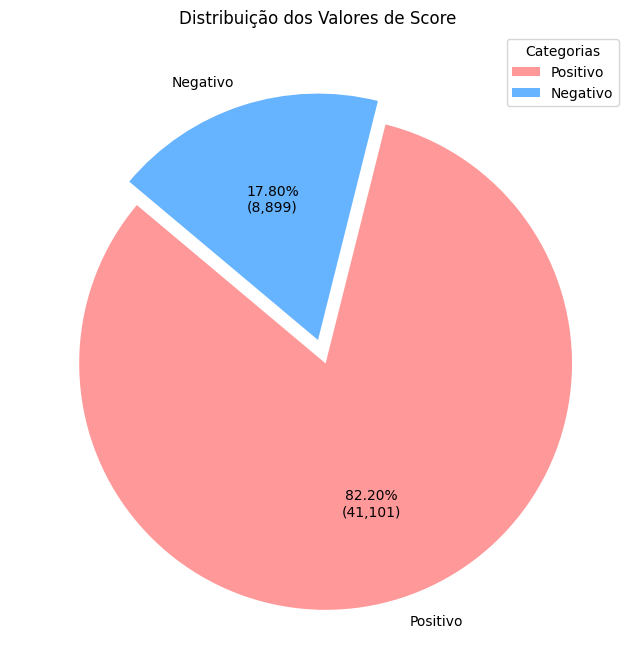

In [ ]:
valores = reviews['score'].value_counts()
labels = ['Positivo', 'Negativo']
cores = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Destacar a primeira fatia

plt.figure(figsize=(8, 8))  # Tamanho do gráfico
plt.pie(valores, labels=labels, colors=cores, explode=explode, autopct=lambda p: '{:.2f}%\n({:,.0f})'.format(p, (p/100)*valores.sum()), startangle=140)
plt.title('Distribuição dos Valores de Score')
plt.legend(labels, title="Categorias")
plt.show()

Pelo gráfico percebe-se que os dados estão desbalanceados, abaixo exibimos as palavras para uma melhor visualização.

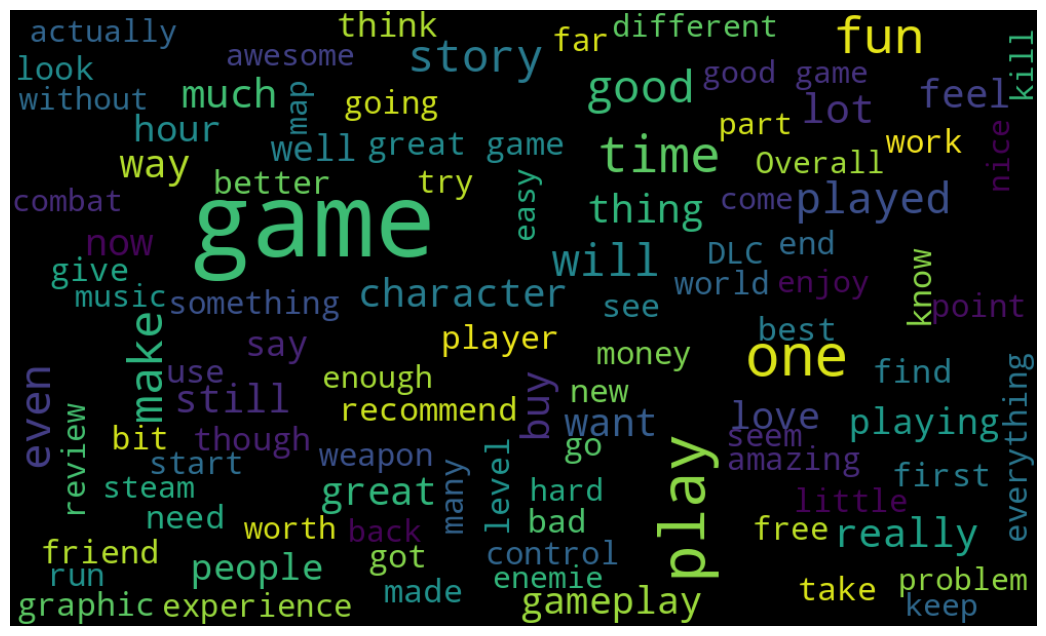

In [ ]:
txt = ' '.join(rev for rev in reviews.text)

plt.figure(figsize=(15, 8))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=600
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Agora fazendo a nuvem de palavras para reviews positivas e negativas separadamente.

In [ ]:
positivo = reviews[reviews['score']==1]
negativo = reviews[reviews['score']==-1]

Nuvem de palavra para as reviews positivas.

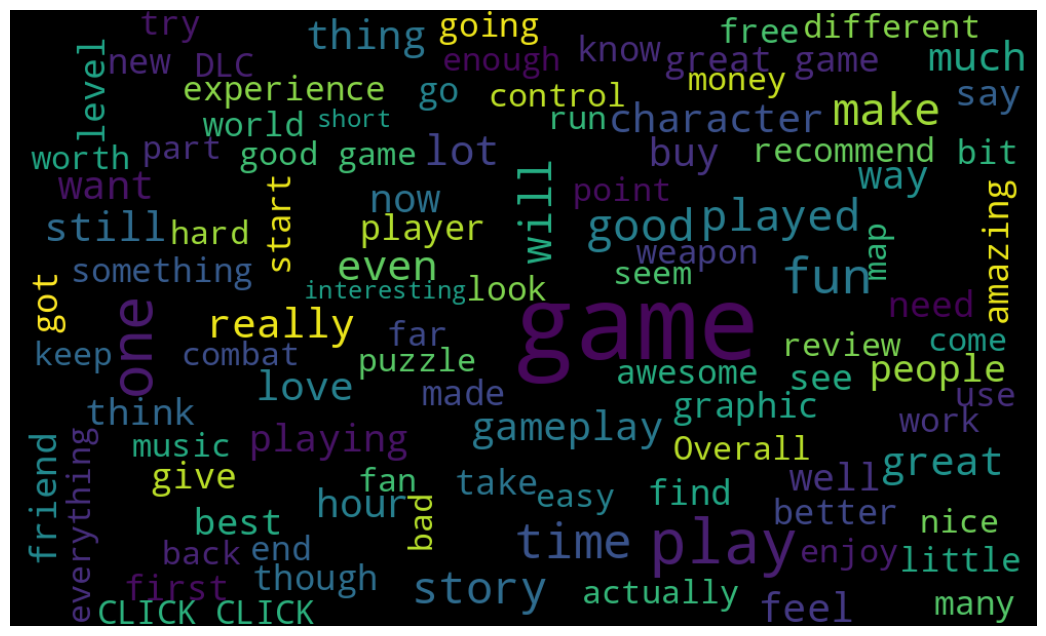

In [ ]:
txt = ' '.join(rev for rev in positivo.text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Note que na nuvem de palavras das reviews positivas as palavras mais comuns são "great", "amazing", "fun", "nice".

Agora fazendo a nuvem de palavras para as reviews negativas.

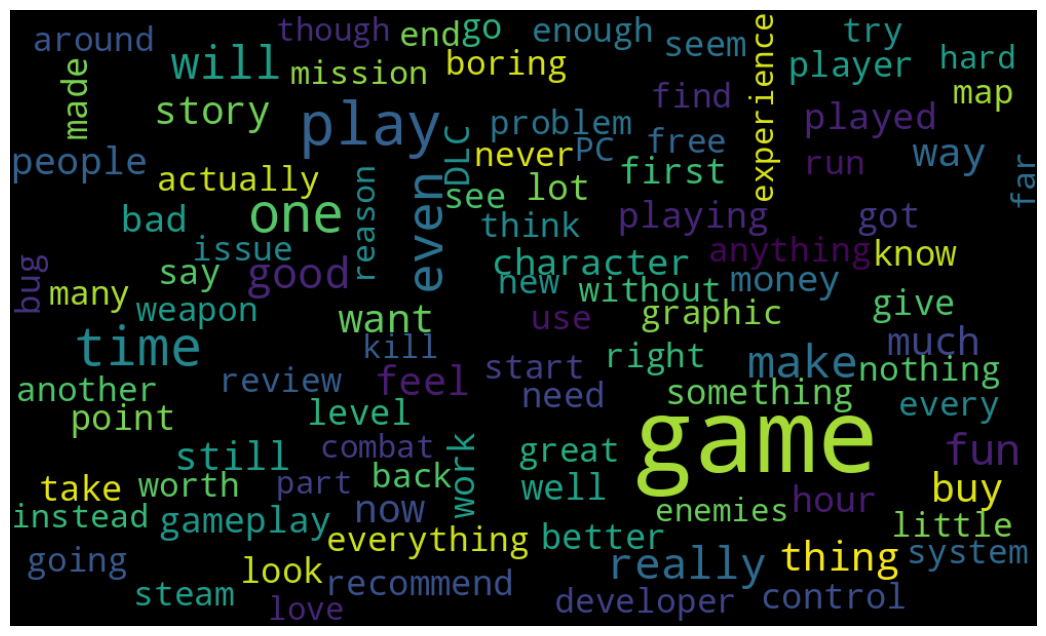

In [ ]:
txt = ' '.join(rev for rev in negativo.text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

Note agora que na análise da nuvem de palavras das reviews negativas a ocorrência de palavras como 'bad', 'problem' é mais frequênte.

### Tendo feito essa preparação inicial agora faremos o processamento dos dados:

- **LowerCase**
- **Tokenização**
- **Remoção de Caracteres Especiais**
- **Remoção de Stop Words e Pontuação**
- **Stemming**

In [ ]:
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Função `converterTexto(text)`

A função `convert_text` abaixo é usada para pré-processar texto para análise de linguagem natural (PLN). Ela realiza as seguintes operações padrão de PLN, normalização, tokenização, remoção de stop words e pontuação, e stemming.

#### Passos de Processamento:

1. **Normalização**:
   - Converte todo o texto para letras minúsculas.
   - `text = text.lower()`

2. **Tokenização**:
   - Divide o texto em tokens (palavras).
   - `text = nltk.word_tokenize(text)`

3. **Remoção de Stop Words e Pontuação**:
   - Remove palavras comuns (stop words) e caracteres de pontuação.
   - Usa a lista de stop words em inglês do `nltk`.
   - Verifica cada token e o mantém se não for stop word ou pontuação.

4. **Stemming**:
   - Reduz as palavras para suas raízes ou formas base.
   - Aplica o processo de stemming em cada token restante.

#### Retorno:
- Retorna o texto pré-processado como uma única string, com palavras separadas por espaços.


In [ ]:
def converterTexto(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x = []
    y =[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    for i in x:
        y.append(ps.stem(i))
    return ' '.join(y)

Texto antes da função ser aplicada:

In [ ]:
reviews.reset_index(drop = True, inplace = True)
reviews['text'][18]

'Right now it says that im permantly banned from playing on black ops 2 servers and i am 100% this a mistaake or glitch or something'

Aplicar função:

In [ ]:
reviews['converted_text']=reviews['text'].apply(converterTexto)

Texto após aplicar a função:

In [ ]:
reviews['converted_text'][18]

'right say im permantli ban play black op 2 server 100 mistaak glitch someth'

In [ ]:
reviews.head()

,score,text,review_votes,app_name,converted_text
0,1,This game is just.............. AWESOME!!!! 'R...,0,PAYDAY: The Heist,game .............. awesom 'run around rob ban...
1,1,"Pretty good game, addictive , Its so much more...",0,A Story About My Uncle,pretti good game addict much better look like ...
2,1,"Great controls, best ARPG controls I've tried.",0,Victor Vran,great control best arpg control 've tri
3,1,"I've got this on xbox, and now the PC. It runs...",0,Saints Row IV,'ve got xbox pc run look better xbox alway one...
4,1,What's better than listening to music? Having ...,0,Beat Hazard,'s better listen music music make game 's 's b...


Ainda falta limpar os dados removendo emojis e hyperlinks, para isso criaremos mais duas funções:

In [ ]:
def limpar(raw):
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [ ]:
def removerNumeros(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [ ]:
def removerEmojis(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
        u"\U0001F680-\U0001F6FF"  # símbolos de transporte e mapas
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
def limpando(df,review):
    df[review] = df[review].apply(limpar)
    df[review] = df[review].apply(removerEmojis)
    df[review] = df[review].apply(removerNumeros)

Aplicando as funções criadas acima:

In [ ]:
limpando(reviews,'converted_text')
reviews[['converted_text']].head(15)

,converted_text
0,game .............. awesom 'run around rob ban...
1,pretti good game addict much better look like ...
2,great control best arpg control 've tri
3,'ve got xbox pc run look better xbox alway one...
4,'s better listen music music make game 's 's b...
5,constip play fine
6,got . cent sale even feel slightli rip
7,'s shame wast money game hope buggi mess
8,play game hr time write realli find reason n'...
9,bought steam holday sale idl trade card ez pr...


Topico 1: (0, '0.009*"\'s" + 0.008*"get" + 0.007*"like" + 0.006*"enemi"')
Topico 2: (1, '0.099*"game" + 0.039*"/" + 0.037*"play" + 0.024*"best"')
Topico 3: (2, '0.064*"game" + 0.021*"play" + 0.019*"n\'t" + 0.013*"get"')
Topico 4: (3, '0.067*"click" + 0.033*"gt" + 0.014*"fallout" + 0.009*"batman"')
Topico 5: (4, '0.066*"game" + 0.023*"\'s" + 0.016*"play" + 0.013*"n\'t"')
Index(['score', 'text', 'review_votes', 'app_name', 'converted_text', 'tokens',
       'Topic'],
      dtype='object')
int64


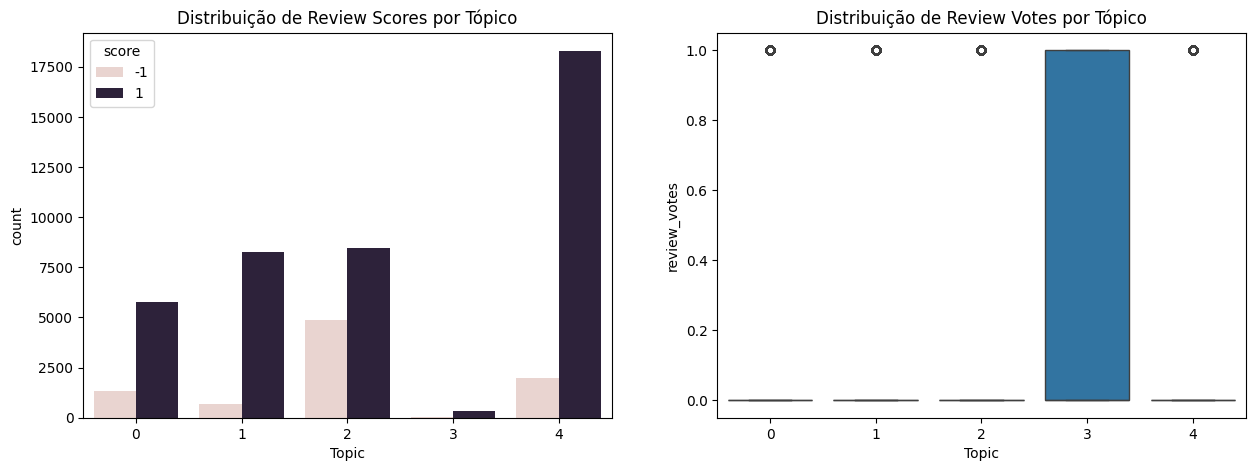


Jogos relacionados ao Tópico 1:
['Alien Rage - Unlimited' 'One Finger Death Punch' 'Elite Dangerous'
 'Gone Home' 'PlanetSide 2' 'PAYDAY 2' 'Prison Architect'
 'Crusader Kings II' 'DOOM'
 'Warhammer 40,000: Space Marine - Anniversary Edition']

Jogos relacionados ao Tópico 2:
['Grand Theft Auto IV: The Complete Edition' 'KRUM - Edge Of Darkness'
 'PAYDAY: The Heist' "Tom Clancy's Rainbow Six Siege" 'Super Hexagon'
 'Close Your Eyes' 'BattleBlock Theater' 'Prison Architect'
 'Counter-Strike: Source' 'No More Room in Hell']

Jogos relacionados ao Tópico 3:
['PAYDAY: The Heist' 'A Story About My Uncle' 'Saints Row IV'
 "Five Nights at Freddy's" 'Stellar 2D' 'Nether' 'Sun Blast'
 'Call of Duty: Black Ops II' 'Risk of Rain' 'DRAGON BALL XENOVERSE 2']

Jogos relacionados ao Tópico 4:
['Clicker Heroes' 'Simply Chess' 'Sakura Spirit'
 'METAL GEAR SOLID V: THE PHANTOM PAIN' 'Half-Life 2'
 'Commander: Conquest of the Americas' 'Turbo Dismount'
 'Amnesia: The Dark Descent' 'Dead Rising 3' 'Chiva

In [ ]:
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

reviews['tokens'] = reviews['converted_text'].apply(lambda x: x.split())

dictionary = corpora.Dictionary(reviews['tokens'])

doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews['tokens']]

# Configurar e treinar o modelo LDA
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)

# Visualização dos tópicos
topics = ldamodel.print_topics(num_words=4)
for i, topic in enumerate(topics):
    print(f"Topico {i+1}: {topic}")

topic_results = ldamodel[doc_term_matrix]
reviews['Topic'] = [max(result, key=lambda item:item[1])[0] for result in topic_results]

print(reviews.columns)
print(reviews['score'].dtype)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Topic', hue='score', data=reviews, ax=axes[0])
axes[0].set_title('Distribuição de Review Scores por Tópico')
sns.boxplot(x='Topic', y='review_votes', data=reviews, ax=axes[1])
axes[1].set_title('Distribuição de Review Votes por Tópico')
plt.show()

# Relacionar jogos com tópicos
for i in range(5):
    print(f"\nJogos relacionados ao Tópico {i+1}:")
    print(reviews[reviews['Topic'] == i]['app_name'].unique()[:10])  # Imprime os primeiros 10 jogos de cada tópico


## Análise de Tópicos

### Tópico 1: Tecnologia e Ficção Científica
Termos como "portal", "http", e "black" sugerem discussões sobre elementos tecnológicos ou de ficção científica nos jogos. Títulos como "Portal" e "Call of Duty: Black Ops II" ou que reforçam essa temática.

### Tópico 2: Narrativa e Enredo
Palavras como "game", "'s" e "n't" podem indicar conversas sobre as histórias e narrativas dos jogos. Jogos como "Tomb Raider" e "Dragon Age: Origins" são representativos deste tópico.

### Tópico 3: Jogabilidade e Experiência de Jogo
Termos como "play" e "get" apontam para a jogabilidade e a experiência interativa dos jogos. "Sid Meier's Civilization VI" e "Rocket League" são exemplos de jogos focados na mecânica de jogo.

### Tópico 4: Ação e Combate
Este tópico inclui palavras como "enemi", "weapon", "kill", e "get", indicando uma ênfase em ação e combate. "Call of Duty: Black Ops III" e "Left 4 Dead 2" se encaixam bem aqui.

### Tópico 5: Diversão e Qualidade
Com termos como "fun" e "good", este tópico parece abranger jogos considerados agradáveis e de alta qualidade, exemplificados por "The Witcher 3: Wild Hunt" e "Dota 2".

## Análise de Visualizações

- **Distribuição de Review Scores por Tópico**: O gráfico mostra que o Tópico 2 possui o maior número de reviews, com uma predominância de avaliações negativas. Por outro lado, o Tópico 5 tem uma proporção mais equilibrada, inclinando-se para avaliações positivas.

- **Distribuição de Review Votes por Tópico**: Os boxplots indicam que o Tópico 0 tem um número relativamente alto de votos, o que pode significar que as reviews são mais valorizadas ou consideradas úteis pela comunidade. Outliers são observados em todos os tópicos, indicando algumas reviews com um número excepcionalmente alto de votos.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


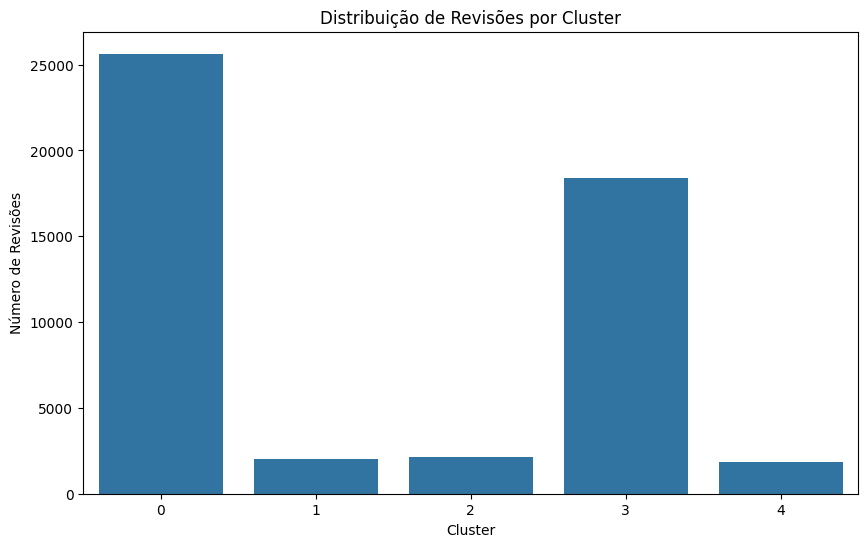

Termos mais representativos por cluster:
Cluster 0:
game, like, play, fun, buy, love, time, good, awesom, worth

Cluster 1:
good, game, realli, pretti, play, fun, stori, like, buy, graphic

Cluster 2:
great, game, play, fun, stori, love, friend, good, realli, gameplay

Cluster 3:
game, play, fun, like, realli, time, love, stori, make, good

Cluster 4:
best, game, play, ve, time, rpg, year, fp, far, stori



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews['converted_text'])

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


reviews['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='Cluster')
plt.title('Distribuição de Revisões por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Revisões')
plt.show()

print("Termos mais representativos por cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print(f"Cluster {i}:")
    print(', '.join([terms[ind] for ind in order_centroids[i, :10]]))
    print()


In [ ]:
games_clusters = reviews.groupby(['app_name', 'Cluster']).size().reset_index(name='Count')

games_clusters = games_clusters.sort_values(by=['Cluster', 'Count'], ascending=[True, False])

# Exibe os jogos mais representativos de cada cluster
for cluster in sorted(games_clusters['Cluster'].unique()):
    print(f"Jogos mais representativos do Cluster {cluster}:")
    top_games = games_clusters[games_clusters['Cluster'] == cluster].head(10)
    print(top_games[['app_name', 'Count']])
    print("\n")


Jogos mais representativos do Cluster 0:
                         app_name  Count
5250                     PAYDAY 2    411
7265                     Terraria    395
2173                       Dota 2    284
8196                    Undertale    229
8421                     Warframe    229
6018                Rocket League    220
483                        Arma 3    210
4222                Left 4 Dead 2    197
3242           Grand Theft Auto V    182
1180  Call of Duty: Black Ops III    166


Jogos mais representativos do Cluster 1:
                         app_name  Count
7266                     Terraria     43
5251                     PAYDAY 2     40
2174                       Dota 2     32
8422                     Warframe     32
4223                Left 4 Dead 2     22
7920                  Tomb Raider     22
1181  Call of Duty: Black Ops III     20
6019                Rocket League     17
6229                Saints Row IV     17
2095                   Dishonored     16


Jogos mais r

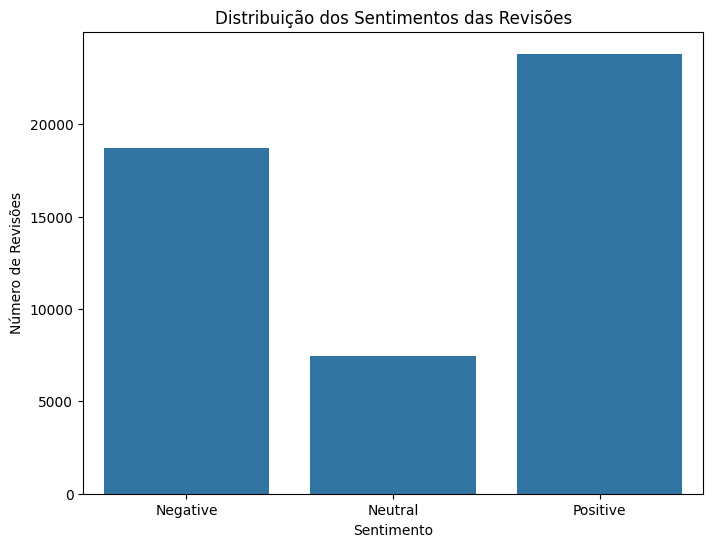

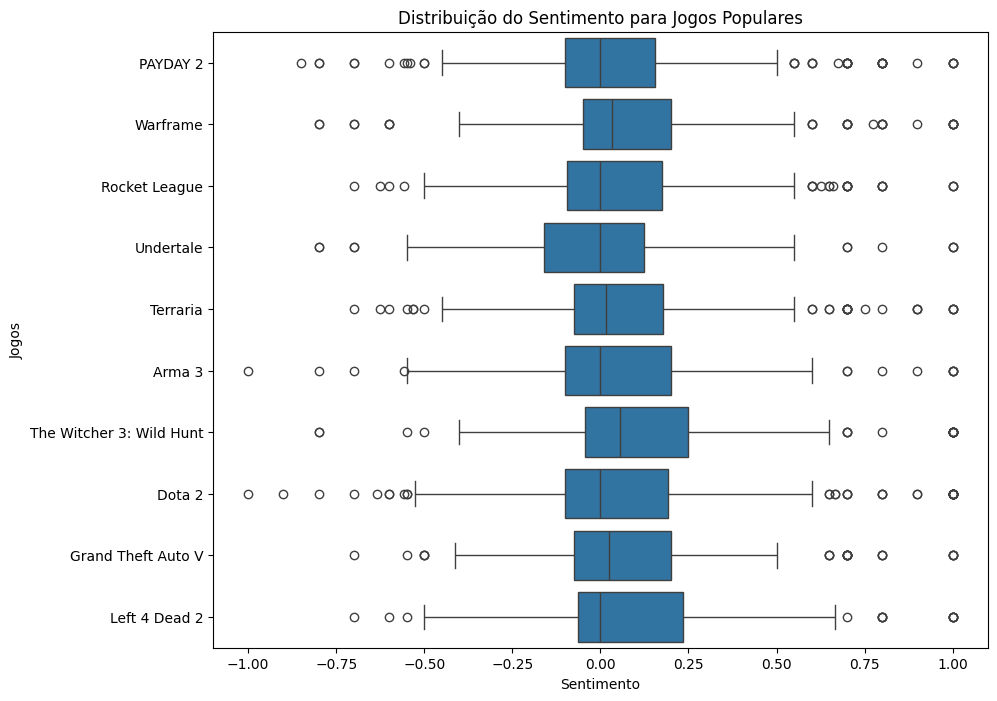

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity

reviews['Sentiment'] = reviews['converted_text'].apply(get_sentiment)

reviews['Sentiment_Category'] = pd.cut(reviews['Sentiment'],
                                        bins=[-1, -0.01, 0.01, 1],
                                        labels=["Negative", "Neutral", "Positive"])

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=reviews, order=["Negative", "Neutral", "Positive"])
plt.title('Distribuição dos Sentimentos das Revisões')
plt.xlabel('Sentimento')
plt.ylabel('Número de Revisões')
plt.show()

popular_games = reviews['app_name'].value_counts().head(10).index
reviews_popular_games = reviews[reviews['app_name'].isin(popular_games)]
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sentiment', y='app_name', data=reviews_popular_games, orient='h')
plt.title('Distribuição do Sentimento para Jogos Populares')
plt.xlabel('Sentimento')
plt.ylabel('Jogos')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews['converted_text'])

pca = IncrementalPCA(n_components=2)
principalComponents = pca.fit_transform(X)

reviews['pc1'] = principalComponents[:, 0]
reviews['pc2'] = principalComponents[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pc1', y='pc2', data=reviews, alpha=0.7)
plt.title('Visualização PCA das Revisões')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
reviews['cluster_pca'] = kmeans.fit_predict(principalComponents)


plt.figure(figsize=(10, 8))
sns.scatterplot(x='pc1', y='pc2', hue='cluster_pca', data=reviews, palette='viridis', alpha=0.7)
plt.title('Clustering PCA das Revisões')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


NameError: name 'reviews' is not defined